## Пингвины

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("drive/MyDrive/data/penguin/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


# Информация о датасете

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [6]:
df = df[df['sex'].isnull() == False]

In [7]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.body_mass_g.fillna(df.body_mass_g.mean())

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
339    4000.0
340    3400.0
341    3775.0
342    4100.0
343    3775.0
Name: body_mass_g, Length: 333, dtype: float64

# Визуализация

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

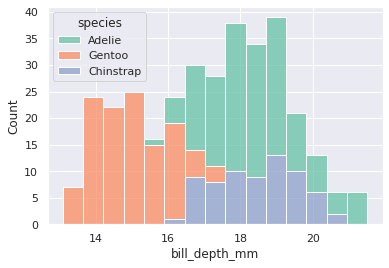

In [9]:
sns.histplot(data=df, x="bill_depth_mm", bins=15, hue="species", multiple="stack",
            palette="Set2")

(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <BarContainer object of 10 artists>)

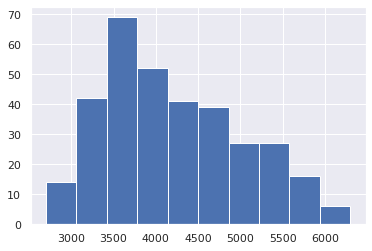

In [10]:
plt.hist(df['body_mass_g'])

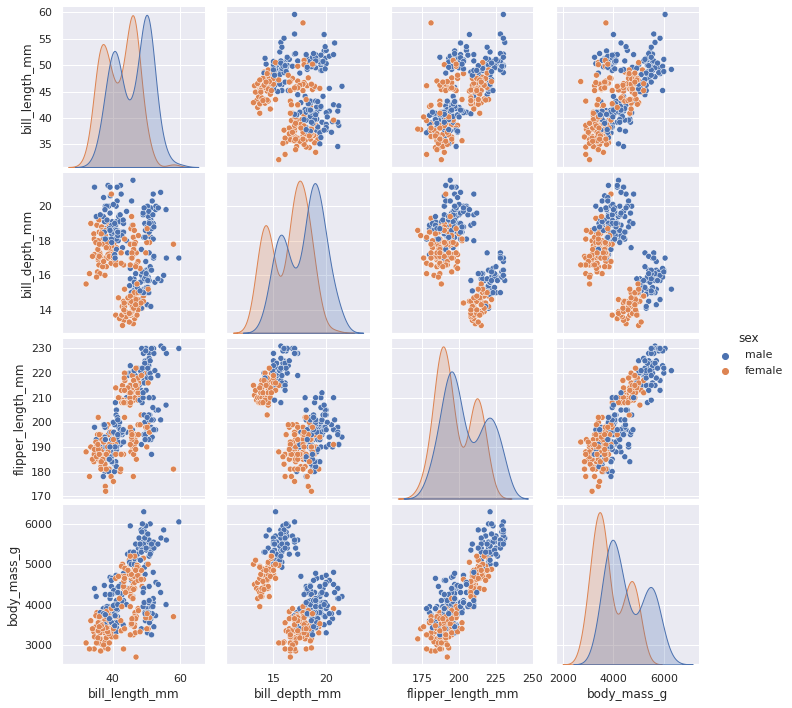

In [11]:
sns.pairplot(df, kind="scatter", hue="sex")

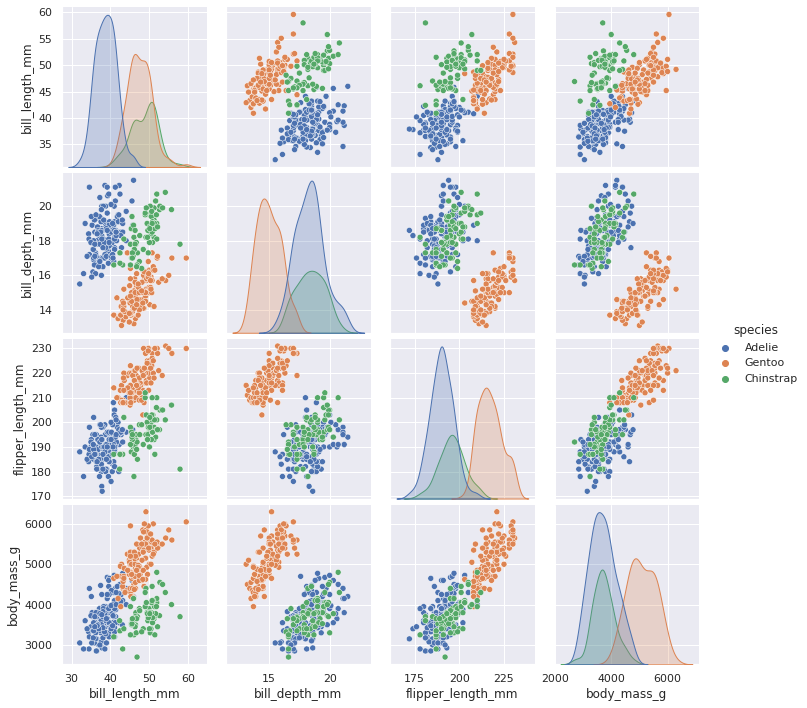

In [12]:
sns.pairplot(df, kind="scatter", hue="species")

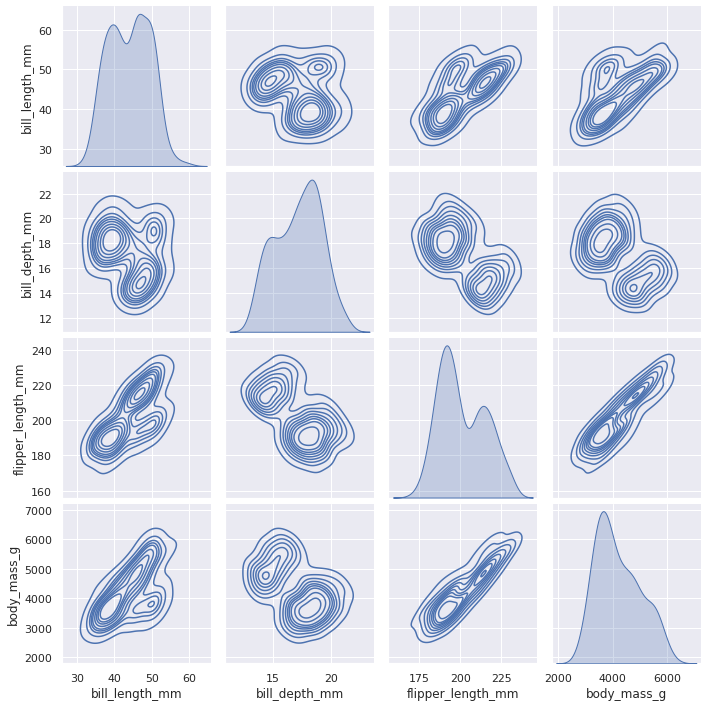

In [13]:
sns.pairplot(df, kind="kde")

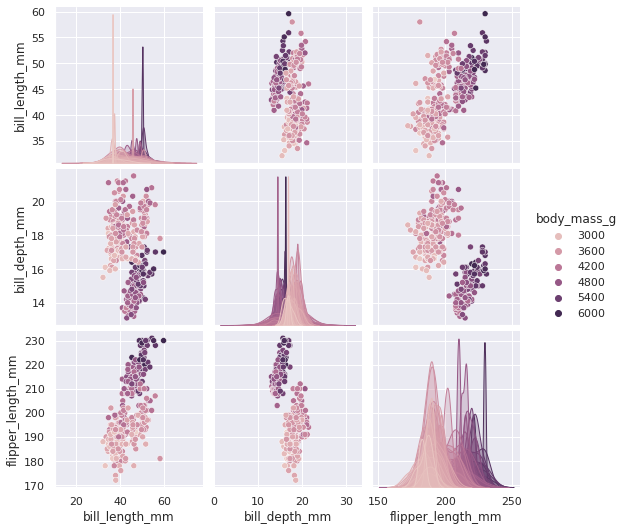

In [14]:
sns.pairplot(df, kind="scatter", hue="body_mass_g")

# Выбросы

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_length_mm'>

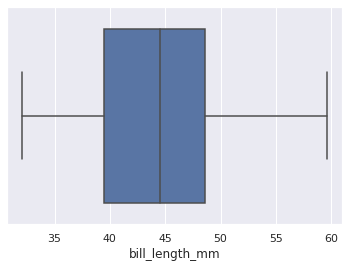

In [15]:
sns.boxplot(df['bill_length_mm'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_depth_mm'>

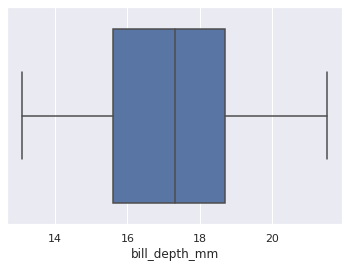

In [16]:
sns.boxplot(df.bill_depth_mm)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body_mass_g'>

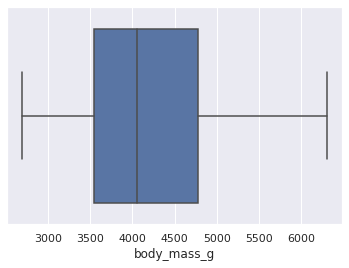

In [17]:
sns.boxplot(df.body_mass_g)

# Тепловая карта

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

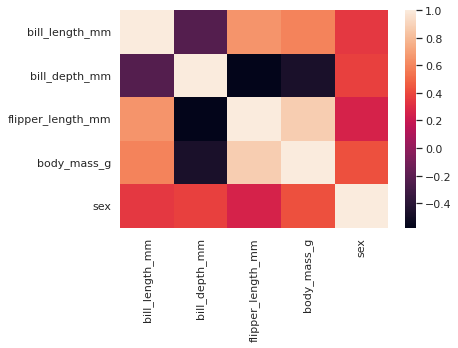

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex .fit_transform(df.sex)

sns.heatmap(df.corr())

# Кодирование категориальных признаков

In [19]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler
scaler_mm = MinMaxScaler()
df[['mm_body_mass_g', 'mm_bill_length_mm']] = scaler_mm.fit_transform(df[['body_mass_g', 'bill_length_mm']])
df.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,mm_body_mass_g,mm_bill_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0.291667,0.254545
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0.305556,0.269091
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0.152778,0.298182
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0.208333,0.167273
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0.263889,0.261818


In [24]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
isl = pd.DataFrame(onehotencoder.fit_transform(df[['island']]).toarray())
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,mm_body_mass_g,mm_bill_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,0.291667,0.254545
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,0.305556,0.269091
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,0.152778,0.298182
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,0.208333,0.167273
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,0.263889,0.261818
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,1,0.361111,0.861818
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,0,0.194444,0.414545
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,1,0.298611,0.636364
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,1,0.388889,0.680000


# Нормализация

<AxesSubplot:xlabel='mm_bill_length_mm', ylabel='body_mass_g'>

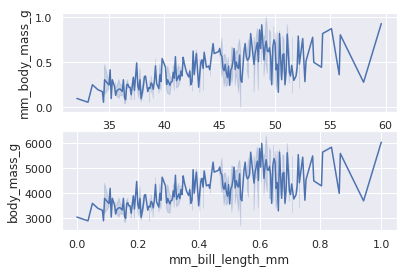

In [21]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=df, x='bill_length_mm', y='mm_body_mass_g', ax=axs[0])
sns.lineplot(data=df, x='mm_bill_length_mm', y='body_mass_g', ax=axs[1])

# PCA

In [22]:
from sklearn import decomposition

In [23]:
pca = decomposition.PCA()
fa = decomposition.FactorAnalysis()
X = 
#XPCAreduced = pca.fit_transform(df[['bill_depth_mm',	'flipper_length_mm','	body_mass_g',	'sex	mm_body_mass_g',	'mm_bill_length_mm']])

SyntaxError: ignored